In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, InputLayer, Flatten, BatchNormalization, Layer, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Model
import tensorflow_probability as tfp

In [ ]:
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True)

In [ ]:
# Creating a function for dataset split
def dataset_split(dataset, train_ratio, test_ratio, val_ratio):
  '''
  This function use to split dataset into train, test and validation dataset.
  And it's returns train, test, validation datasets.
  Arg:
    dataset: the dataset you have.
    train ratio: train dataset ratio between 0-1 where 1 represent 100%.
    test ratio: test dataset ratio 0-1.
    val_ration: validation data ratio 0-1.

  '''
  #main_dataset
  #print(list(dataset.as_numpy_iterator()))
  dataset_size = len(dataset)

  # for training dataset
  train_dataset = dataset.take(int(dataset_size*train_ratio))
  #print(list(train_dataset.as_numpy_iterator()))

  # for test dataset
  test_dataset_list = dataset.skip(int(dataset_size * train_ratio))
  test_dataset = test_dataset_list.take(int(dataset_size * test_ratio))
  #print(list(test_dataset_list.as_numpy_iterator()))
  #print(list(test_dataset.as_numpy_iterator()))

  # For validation dataset
  val_dataset = test_dataset_list.skip(int(dataset_size * test_ratio))
  #print(list(val_dataset.as_numpy_iterator()))

  return train_dataset, test_dataset, val_dataset

In [ ]:
# Calling the dataset_split function
train_dataset, test_dataset, val_dataset = dataset_split(dataset['train'], train_ratio=.7, test_ratio=.15, val_ratio=.15)

In [ ]:
for data in train_dataset.take(2):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(115, 157, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [ ]:
train_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

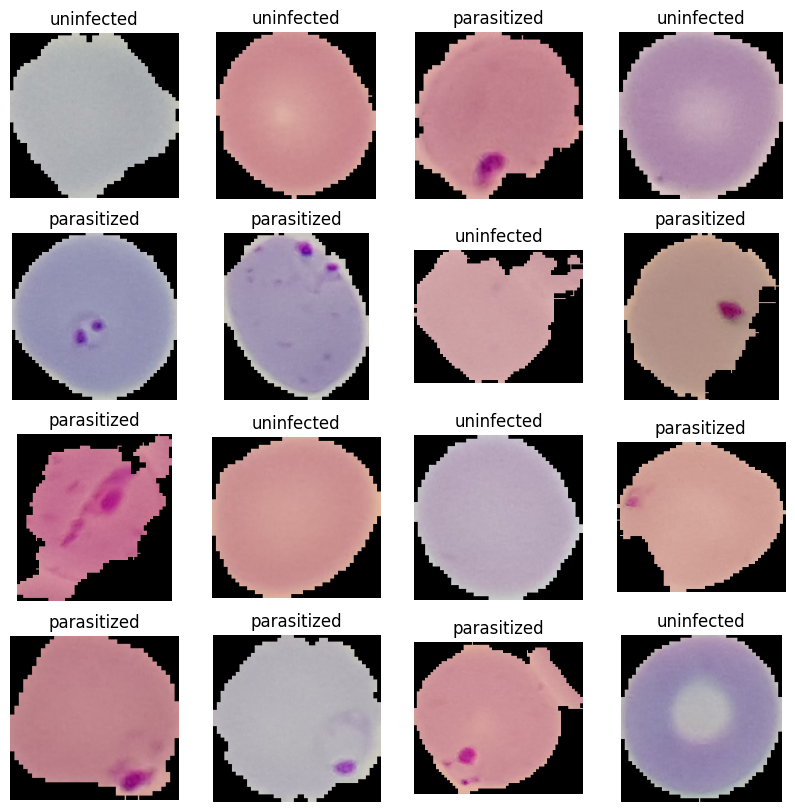

In [ ]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_dataset.take(16)):
  plt.subplot(4, 4, i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

In [ ]:
img_size = 224
# creating a function for resize and rescale dataset
def resize_rescale(image, label):
  return tf.image.resize(image, (img_size, img_size))/255.0, label

Model_Creation

In [ ]:
class FeatureExtractor(Layer):
  def __init__(self, filters, kernel_size, strides, padding, activation, pool_size):
    super(FeatureExtractor, self).__init__()

    self.Conv2D_1 = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)
    self.batch_normalization_1 = BatchNormalization()
    self.MaxPool2D_1 =  MaxPool2D(pool_size=pool_size, strides=2*strides)

    self.Conv2D_2 = Conv2D(filters=2*filters, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)
    self.batch_normalization_2 = BatchNormalization()
    self.MaxPool2D_2 =  MaxPool2D(pool_size=pool_size, strides=2*strides)


  def call(self, x):
    x = self.Conv2D_1(x)
    x = self.batch_normalization_1(x)
    x = self.MaxPool2D_1(x)

    x = self.Conv2D_2(x)
    x = self.batch_normalization_2(x)
    x = self.MaxPool2D_2(x)
    return x
feature_sub_classed = FeatureExtractor(8, 3, 1, "valid", "relu", 2)


In [ ]:
class LenetModel(Model):
  def __init__(self):
    super(LenetModel, self).__init__()

    self.feature_extractor = FeatureExtractor(8, 3, 1, "valid", "relu", 2)
    self.flatten = Flatten()
    self.dense_1 = Dense(100, activation = 'relu')
    self.batch = BatchNormalization()
    self.dense_2 = Dense(10, activation = 'relu')
    self.batch_2 = BatchNormalization()
    self.dense_3 = Dense(1, activation = 'sigmoid')

  def call(self, x):
    x = self.feature_extractor(x)
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.batch(x)
    x = self.dense_2(x)
    x = self.batch_2(x)
    x = self.dense_3(x)

    return x

lenet_subclass_model = LenetModel()
lenet_subclass_model(tf.zeros([1, 224, 224, 3]))
lenet_subclass_model.summary()

Model: "lenet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_1 (Featu  multiple                  1488      
 reExtractor)                                                    
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  4665700   
                                                                 
 batch_normalization_4 (Bat  multiple                  400       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             multiple                  1010      
                                                                 
 batch_normalization_5 (Bat  multiple                  

In [ ]:
# Compile the model

lennet_model = LenetModel()
lennet_model.compile(
    optimizer = Adam(),
    loss = BinaryCrossentropy(),
    metrics = 'accuracy'
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

Mixup augmentation

In [ ]:
train_dataset_1 = train_dataset.shuffle(buffer_size=4096,).map(resize_rescale, num_parallel_calls = tf.data.AUTOTUNE)
train_dataset_2 = train_dataset.shuffle(buffer_size=4096,).map(resize_rescale, num_parallel_calls = tf.data.AUTOTUNE)
mixed_dataset = tf.data.Dataset.zip(train_dataset_1, train_dataset_2)

In [ ]:
def mixup_augmentation(train_dataset_1, train_dataset_2):
  (image_1, label_1), (image_2, label_2) = train_dataset_1, train_dataset_2
  lamda = tfp.distributions.Beta(0.2, 0.2)
  lamda = lamda.sample(1)[0]

  image = lamda * image_1 + (1-lamda)*image_2
  label = lamda * tf.cast(label_1, dtype=tf.float32) + (1-lamda)*tf.cast(label_2, dtype=tf.float32)

  return image, label


In [ ]:
val_dataset

<_SkipDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
val_dataset = val_dataset.shuffle(buffer_size=4096, ).map(resize_rescale, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset

<_ParallelMapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
def val_data_cast(val_dataset):
  image, label = val_dataset
  return image, tf.cast(label, dtype=tf.float32)

In [ ]:
BATCH_SIZE = 32
train_dataset = (
    mixed_dataset
    .shuffle(buffer_size = 1000, reshuffle_each_iteration = True)
    .map(mixup_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
val_dataset = (
    val_dataset
    #.shuffle(buffer_size = 4096, reshuffle_each_iteration = True)
    #.map(mixup_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
lennet_history = lennet_model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 30,
    callbacks = [early_stopping]
)

Epoch 1/30
603/603 [==============================] - 83s 117ms/step - loss: 0.3970 - accuracy: 0.4500 - val_loss: 0.3263 - val_accuracy: 0.8779
Epoch 2/30
603/603 [==============================] - 70s 107ms/step - loss: 0.3064 - accuracy: 0.4763 - val_loss: 0.2744 - val_accuracy: 0.9059
Epoch 3/30
603/603 [==============================] - 77s 116ms/step - loss: 0.2928 - accuracy: 0.4788 - val_loss: 0.2037 - val_accuracy: 0.9318
Epoch 4/30
603/603 [==============================] - 77s 115ms/step - loss: 0.2674 - accuracy: 0.4865 - val_loss: 0.1889 - val_accuracy: 0.9417
Epoch 5/30
603/603 [==============================] - 76s 115ms/step - loss: 0.2491 - accuracy: 0.4818 - val_loss: 0.2268 - val_accuracy: 0.9330
Epoch 6/30
603/603 [==============================] - 77s 119ms/step - loss: 0.2315 - accuracy: 0.4991 - val_loss: 0.2238 - val_accuracy: 0.9216
Epoch 7/30
603/603 [==============================] - 76s 114ms/step - loss: 0.2192 - accuracy: 0.4988 - val_loss: 0.2280 - val_ac

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [ ]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

<Axes: >

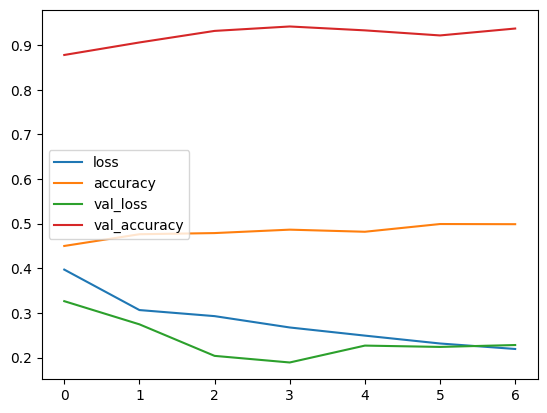

In [ ]:
import pandas as pd
pd.DataFrame(lennet_history.history).plot()

In [25]:
img_size = 224
# creating a function for resize and rescale dataset
def resize(image):
  return tf.image.resize(image, (img_size, img_size))/255.

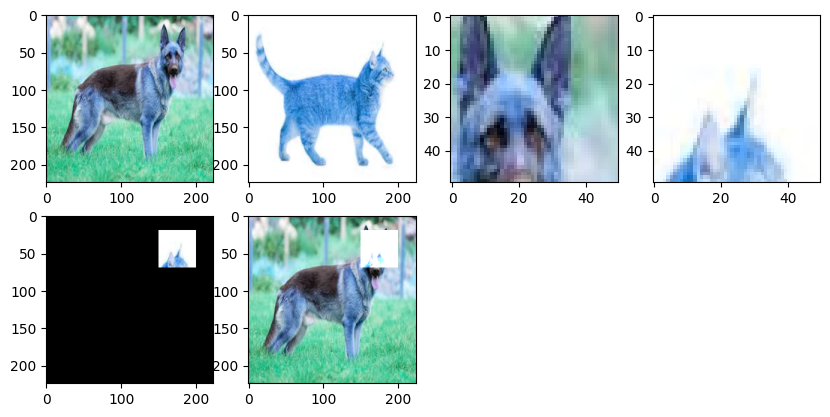

In [35]:
import matplotlib.pyplot as plt
import tensorflow as tf

import cv2
plt.figure(figsize=(10, 10))
image_1 = cv2.imread('/content/dog.jpeg')
image_1 = resize(image_1)
plt.subplot(4, 4, 1)
plt.imshow(image_1)

image_2 = cv2.imread('/content/cat.jpeg')
image_2 = resize(image_2)

plt.subplot(4, 4, 2)
plt.imshow(image_2)

crop_1 = tf.image.crop_to_bounding_box(
    image_1, 20, 150, 50, 50
)
plt.subplot(4, 4, 3)
plt.imshow(crop_1)

crop_2 = tf.image.crop_to_bounding_box(
    image_2, 20, 150, 50, 50
)
plt.subplot(4, 4, 4)
plt.imshow(crop_2)

pad_1 = tf.image.pad_to_bounding_box(crop_2, 20, 150, img_size, img_size)
plt.subplot(4, 4, 5)
plt.imshow(pad_1)

plt.subplot(4, 4, 6)
plt.imshow(image_1 + pad_1)
